# Overall data analysis

In [2]:
import os
import subprocess
from matplotlib import pyplot
import pandas as pd
import numpy as np
from tools import pixels2area
%matplotlib inline

pyplot.rcParams['figure.figsize'] = [24, 10]

os.chdir("C:/Users/Admin/Downloads/Pi8/Pi8")
data = pd.read_csv("./data.csv",delimiter=",", header=0)

def rollingAverage(n, data):
    return np.convolve(data, np.ones(n), 'valid')/n

def dailyAverage(data):
    toReturn = []
    iterations = int(len(data)/24)
    for i in range(iterations):
        toReturn.append(np.mean(data[i * 24:(i + 1) * 24 - 1]))
    return toReturn

def countingSequence(n):
    toReturn = []
    for i in range(n):
        toReturn.append(i + 1)
    return toReturn

def derivative(data, step=1):
    toReturn = []
    for i in range(0, len(data) - 1):
        toReturn.append(float(data[i + 1] - data[i])/step)
    return toReturn

def plot(data, title="Arbitrary Graph", xAxis="x", yAxis="y", save=False, loc="./fig.png", scatter=False):
    sequence = countingSequence(len(data))
    if scatter:
        pyplot.scatter(sequence, data)
    else:
        pyplot.plot(sequence, data)
    pyplot.xlabel(xAxis)
    pyplot.ylabel(yAxis)
    pyplot.title(title)
    pyplot.axhline(y=0, color="black")
    dataMin = min(data)
    dataMax = max(data)
    if dataMin > 0:
        pyplot.ylim(bottom=0, top=(1.2 * dataMax))
    if save:
        pyplot.savefig(loc)
        pyplot.cla()

startOfData = 0

# Straight data

Watering is in red, leaf trim is in purple.

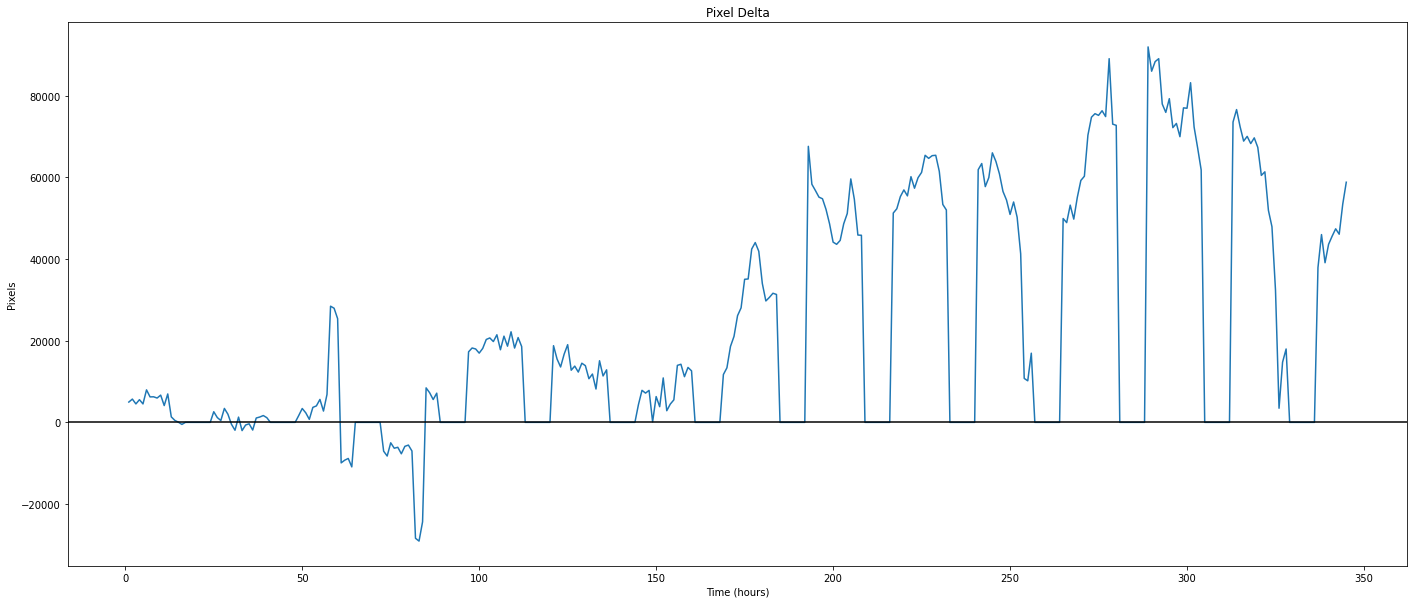

In [3]:
plot(data['PixelDelta'][startOfData:len(data)], 
    title="Pixel Delta",
    xAxis="Time (hours)",
    yAxis="Pixels")

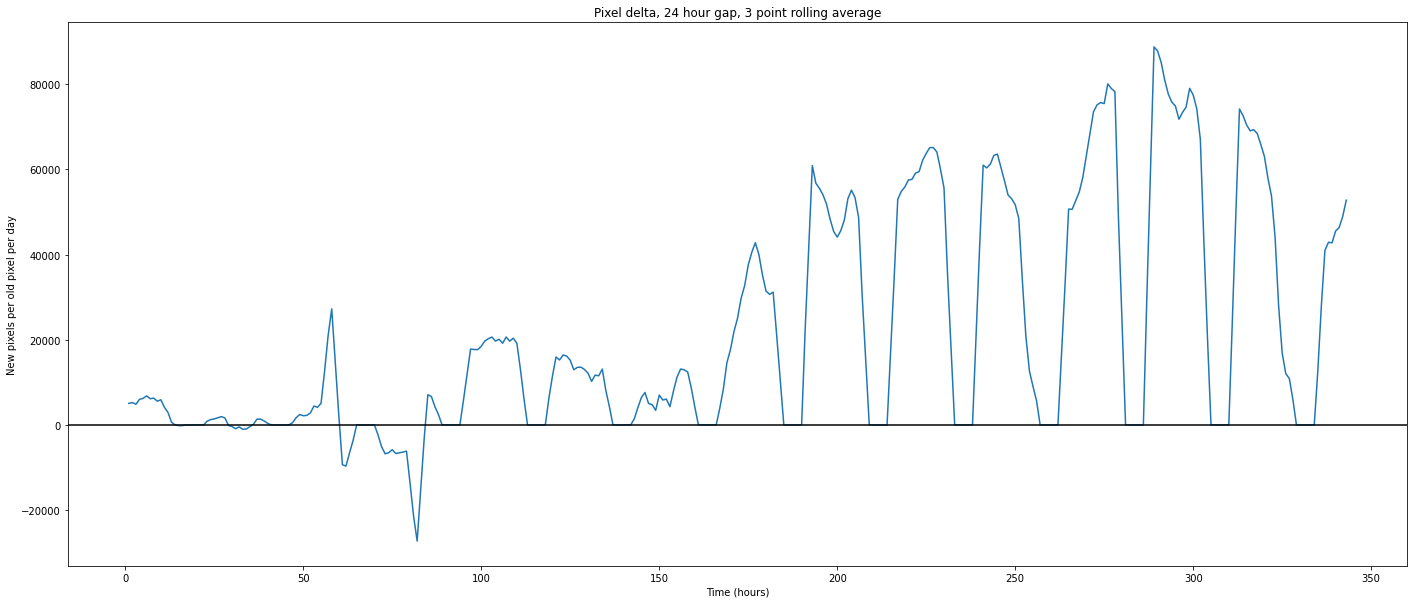

In [4]:
rollingDaily = rollingAverage(3, data['PixelDelta'][startOfData:len(data)])
plot(rollingDaily, title="Pixel delta, 24 hour gap, 3 point rolling average", xAxis="Time (hours)", yAxis="New pixels per old pixel per day")

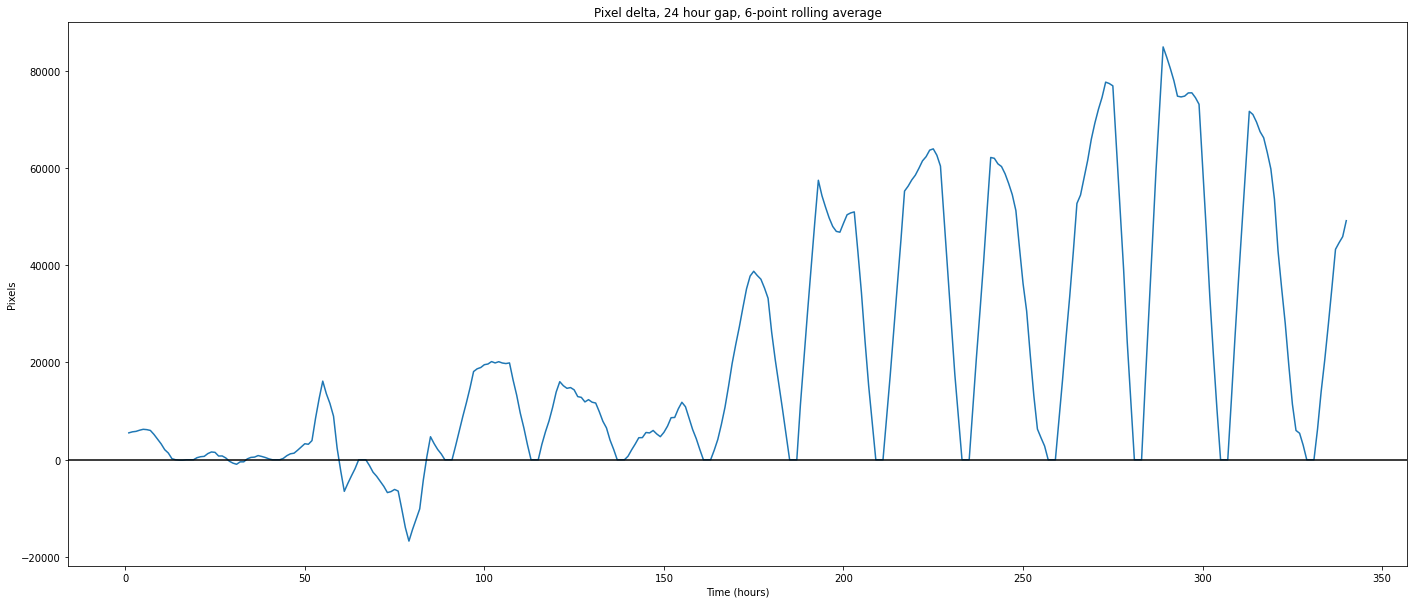

In [5]:
rolling3Hourly = rollingAverage(6, data['PixelDelta'][startOfData:len(data)])
plot(rolling3Hourly, title="Pixel delta, 24 hour gap, 6-point rolling average", xAxis="Time (hours)", yAxis="Pixels")

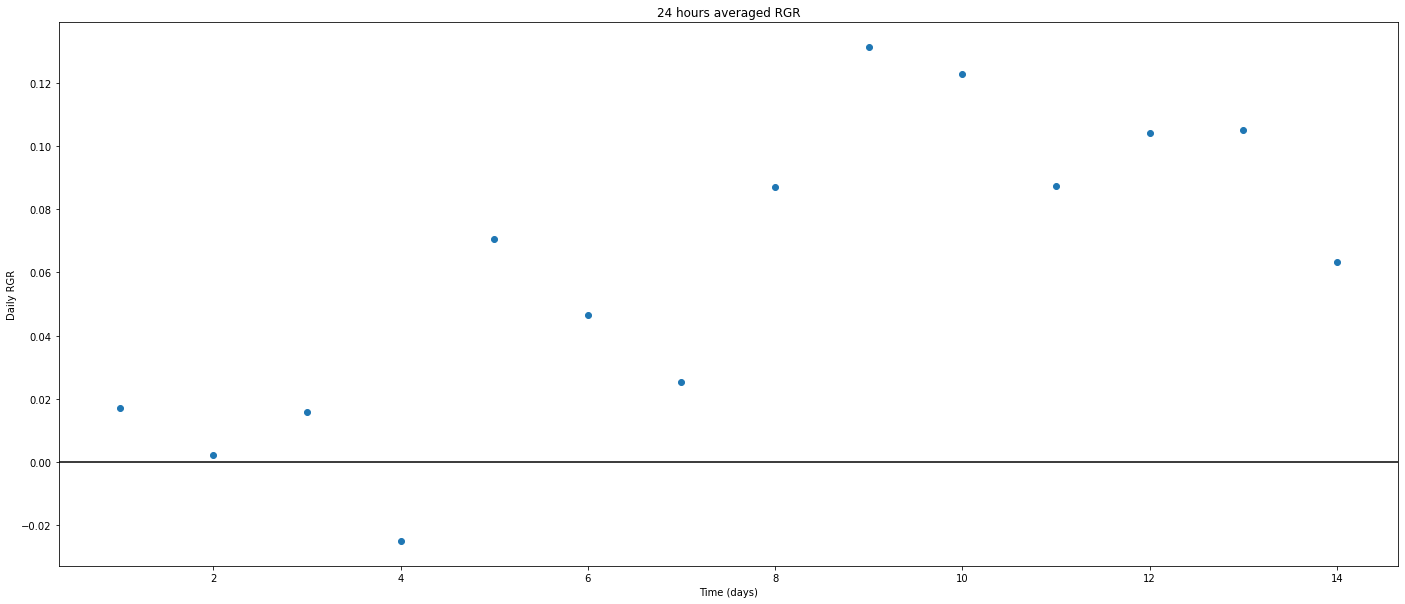

In [6]:
daily = dailyAverage(data['DailyRGR'][startOfData:len(data)])
plot(daily, xAxis="Time (days)", yAxis="Daily RGR", title="24 hours averaged RGR", scatter=True)

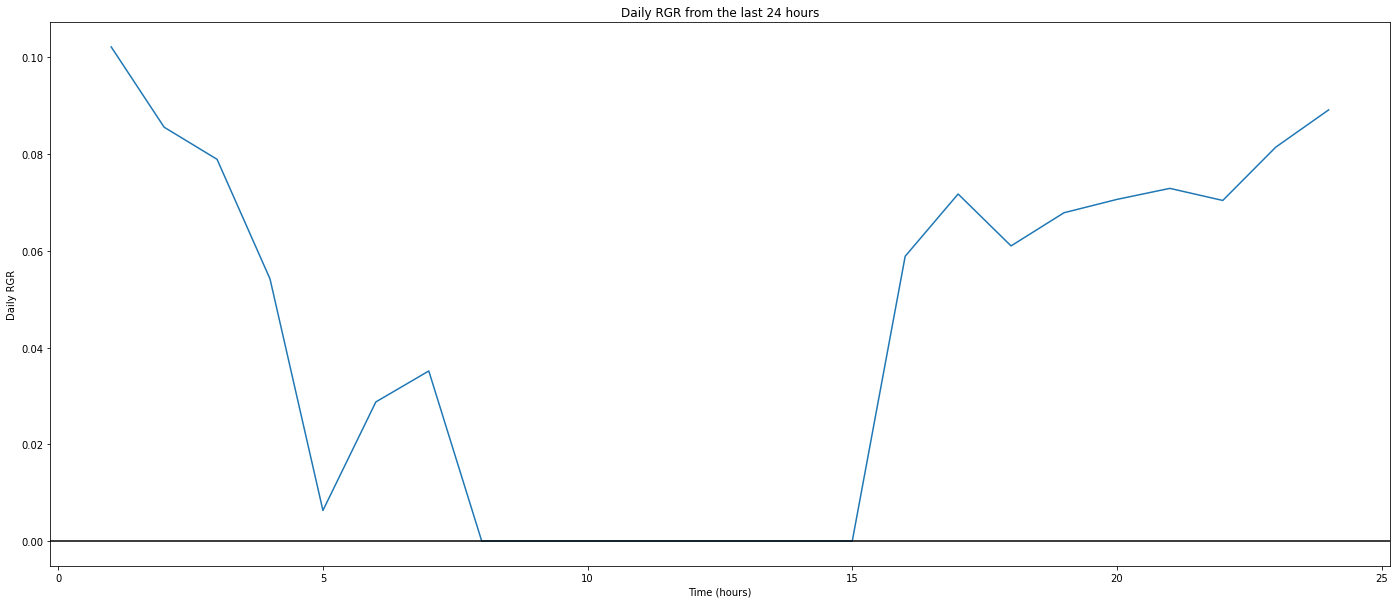

In [9]:
last24 = data["DailyRGR"][-24:len(data)]
plot(last24, title="Daily RGR from the last 24 hours", xAxis="Time (hours)", yAxis="Daily RGR")

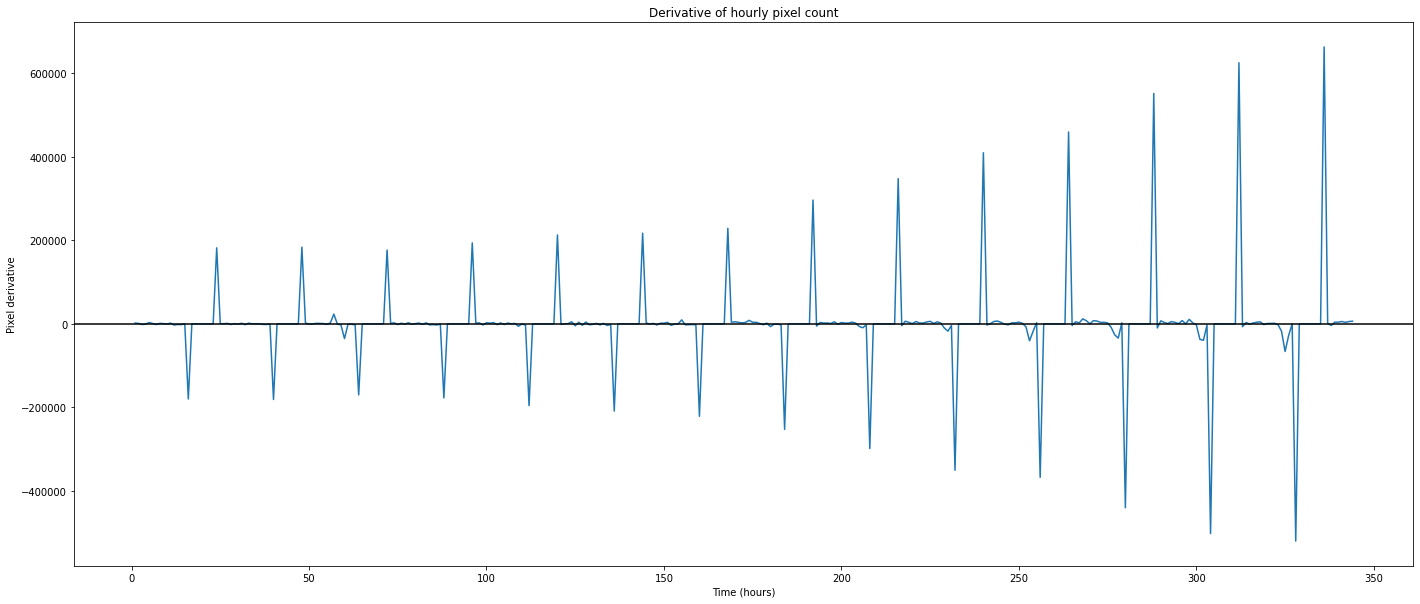

In [10]:
doi = data['NewerInterestingPixels'][startOfData:len(data)].tolist()
derivation = derivative(doi)
plot(derivation, title="Derivative of hourly pixel count", yAxis="Pixel derivative", xAxis="Time (hours)")

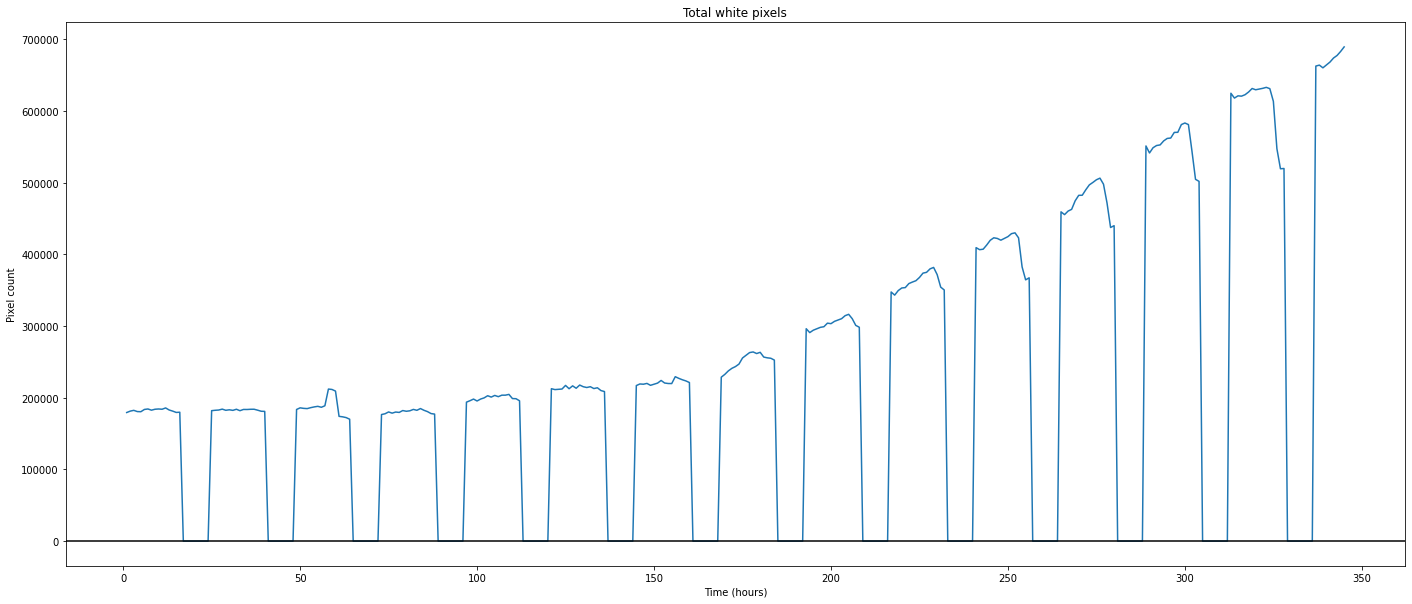

In [11]:
doi = data['NewerInterestingPixels'][startOfData:len(data)]
plot(doi, title="Total white pixels", yAxis="Pixel count", xAxis="Time (hours)")